In [99]:
!pip install ucimlrepo numpy pandas matplotlib scikit-learn

# ***Dataset 1: Iris***

In [100]:
from ucimlrepo import fetch_ucirepo

In [101]:
iris = fetch_ucirepo(id=53)

In [102]:
iris

{'data': {'ids': None,
  'features':      sepal length  sepal width  petal length  petal width
  0             5.1          3.5           1.4          0.2
  1             4.9          3.0           1.4          0.2
  2             4.7          3.2           1.3          0.2
  3             4.6          3.1           1.5          0.2
  4             5.0          3.6           1.4          0.2
  ..            ...          ...           ...          ...
  145           6.7          3.0           5.2          2.3
  146           6.3          2.5           5.0          1.9
  147           6.5          3.0           5.2          2.0
  148           6.2          3.4           5.4          2.3
  149           5.9          3.0           5.1          1.8
  
  [150 rows x 4 columns],
  'targets':               class
  0       Iris-setosa
  1       Iris-setosa
  2       Iris-setosa
  3       Iris-setosa
  4       Iris-setosa
  ..              ...
  145  Iris-virginica
  146  Iris-virginica
  147  

In [103]:
X = iris.data.features
y = iris.data.targets

In [104]:
X.head()

,sepal length,sepal width,petal length,petal width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [105]:
y.head()

,class
0,Iris-setosa
1,Iris-setosa
2,Iris-setosa
3,Iris-setosa
4,Iris-setosa


In [106]:
X.isnull().sum()

,0
sepal length,0
sepal width,0
petal length,0
petal width,0


In [107]:
y.isnull().sum()

,0
class,0


In [108]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(
    iris.data, iris.target, test_size=0.2, random_state=42
)

GaussianNB

In [109]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, f1_score

# Load dataset (Example: Iris dataset)
iris = load_iris()
X = iris.data
Y = iris.target

def gauss_naive_bayes(X, Y, size):
    # Splitting dataset
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=size, random_state=40)

    # Gaussian Naive Bayes model
    GaussClassifier = GaussianNB().fit(X_train, Y_train)

    # Predict on test set
    Y_predict = GaussClassifier.predict(X_test)

    # Metrics
    accuracy = accuracy_score(Y_test, Y_predict)
    precision = precision_score(Y_test, Y_predict, average='weighted')
    recall = recall_score(Y_test, Y_predict, average='weighted')
    f1 = f1_score(Y_test, Y_predict, average='weighted')

    # Print metrics
    print(f"Test Size: {size}")
    print("==================================================")
    print("Accuracy Score: {:.4f}".format(accuracy))
    print("==================================================")
    print("Precision: {:.4f}".format(precision))
    print("==================================================")
    print("Recall: {:.4f}".format(recall))
    print("==================================================")
    print("F1-Score: {:.4f}".format(f1))
    print("==================================================")
    print("Confusion Matrix:\n", confusion_matrix(Y_test, Y_predict))
    print("==================================================")
    print("Classification Report:\n", classification_report(Y_test, Y_predict))
    print("==================================================================================")

    return accuracy

In [110]:
#Generating Report for different Test Sizes
gauss_accuracy_scores = []
test_sizes = [0.5, 0.4, 0.3, 0.2, 0.1]

for size in test_sizes:
    print(f"Report of Gaussian Naive Bayes for test size: {size}")
    gauss_accuracy_scores.append(gauss_naive_bayes(X, Y, size))

print("\nAccuracy Scores for all test sizes:", gauss_accuracy_scores)

Report of Gaussian Naive Bayes for test size: 0.5
Test Size: 0.5
Accuracy Score: 0.9867
Precision: 0.9872
Recall: 0.9867
F1-Score: 0.9867
Confusion Matrix:
 [[27  0  0]
 [ 0 22  0]
 [ 0  1 25]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        27
           1       0.96      1.00      0.98        22
           2       1.00      0.96      0.98        26

    accuracy                           0.99        75
   macro avg       0.99      0.99      0.99        75
weighted avg       0.99      0.99      0.99        75

Report of Gaussian Naive Bayes for test size: 0.4
Test Size: 0.4
Accuracy Score: 0.9833
Precision: 0.9841
Recall: 0.9833
F1-Score: 0.9833
Confusion Matrix:
 [[20  0  0]
 [ 0 20  0]
 [ 0  1 19]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       0.95      1.00      0.98        20
           2       1

***Bargraph***

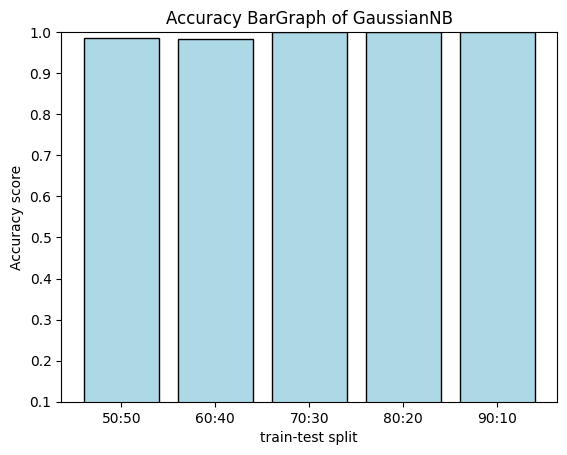

In [111]:
import matplotlib.pyplot as plt
import numpy as np

x=np.array(["50:50","60:40","70:30","80:20","90:10"])
y=np.array(gauss_accuracy_scores)

plt.bar(x,y,align='center',color="lightblue",edgecolor="black")
plt.title('Accuracy BarGraph of GaussianNB')
plt.xlabel('train-test split')
plt.ylim(0.1,1.0)
plt.ylabel('Accuracy score')
plt.show()

***MUltinomialNB***

In [112]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, f1_score

# Load dataset
iris = load_iris()
X = iris.data
Y = iris.target

# Since MultinomialNB expects non-negative features, ensure values are non-negative
X = abs(X)

def multinomial_naive_bayes(X, Y, size):
    # Splitting dataset
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=size, random_state=40)

    # Multinomial Naive Bayes model
    MultiClassifier = MultinomialNB().fit(X_train, Y_train)

    # Predict on test set
    Y_predict = MultiClassifier.predict(X_test)

    # Metrics
    accuracy = accuracy_score(Y_test, Y_predict)
    precision = precision_score(Y_test, Y_predict, average='weighted')
    recall = recall_score(Y_test, Y_predict, average='weighted')
    f1 = f1_score(Y_test, Y_predict, average='weighted')

    # Print metrics
    print(f"Test Size: {size}")
    print("==================================================")
    print("Accuracy Score: {:.4f}".format(accuracy))
    print("==================================================")
    print("Precision: {:.4f}".format(precision))
    print("==================================================")
    print("Recall: {:.4f}".format(recall))
    print("==================================================")
    print("F1-Score: {:.4f}".format(f1))
    print("==================================================")
    print("Confusion Matrix:\n", confusion_matrix(Y_test, Y_predict))
    print("==================================================")
    print("Classification Report:\n", classification_report(Y_test, Y_predict))
    print("==================================================================================")

    return accuracy

In [113]:
#Generating Report for different Test Sizes
multi_accuracy_scores = []
test_sizes = [0.5, 0.4, 0.3, 0.2, 0.1]

for size in test_sizes:
    print(f"Report of Multinomial Naive Bayes for test size: {size}")
    multi_accuracy_scores.append(multinomial_naive_bayes(X, Y, size))

print("\nAccuracy Scores for all test sizes:", multi_accuracy_scores)

Report of Multinomial Naive Bayes for test size: 0.5
Test Size: 0.5
Accuracy Score: 0.7600
Precision: 0.8680
Recall: 0.7600
F1-Score: 0.7313
Confusion Matrix:
 [[27  0  0]
 [ 0 22  0]
 [ 0 18  8]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        27
           1       0.55      1.00      0.71        22
           2       1.00      0.31      0.47        26

    accuracy                           0.76        75
   macro avg       0.85      0.77      0.73        75
weighted avg       0.87      0.76      0.73        75

Report of Multinomial Naive Bayes for test size: 0.4
Test Size: 0.4
Accuracy Score: 0.9667
Precision: 0.9667
Recall: 0.9667
F1-Score: 0.9667
Confusion Matrix:
 [[20  0  0]
 [ 0 19  1]
 [ 0  1 19]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       0.95      0.95      0.95        20
           2  

***Bargraph***

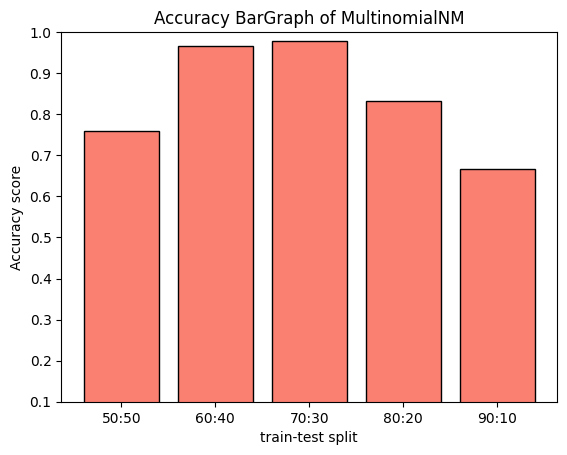

In [114]:
import matplotlib.pyplot as plt
import numpy as np

x=np.array(["50:50","60:40","70:30","80:20","90:10"])
y=np.array(multi_accuracy_scores)

plt.bar(x,y,align='center',color="salmon",edgecolor="black")
plt.title('Accuracy BarGraph of MultinomialNM')
plt.xlabel('train-test split')
plt.ylim(0.1,1.0)
plt.ylabel('Accuracy score')
plt.show()



***BernoulliNB***

In [115]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, f1_score

# Load dataset
iris = load_iris()
X = iris.data
Y = iris.target

# BernoulliNB works best with binary features, so we binarize the data
from sklearn.preprocessing import Binarizer
binarizer = Binarizer(threshold=2.5)
X_bin = binarizer.fit_transform(X)

def bernoulli_naive_bayes(X, Y, size):
    # Splitting dataset
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=size, random_state=40)

    # Bernoulli Naive Bayes model
    BernClassifier = BernoulliNB().fit(X_train, Y_train)

    # Predict on test set
    Y_predict = BernClassifier.predict(X_test)

    # Metrics
    accuracy = accuracy_score(Y_test, Y_predict)
    precision = precision_score(Y_test, Y_predict, average='weighted')
    recall = recall_score(Y_test, Y_predict, average='weighted')
    f1 = f1_score(Y_test, Y_predict, average='weighted')

    # Print metrics
    print(f"Test Size: {size}")
    print("==================================================")
    print("Accuracy Score: {:.4f}".format(accuracy))
    print("==================================================")
    print("Precision: {:.4f}".format(precision))
    print("==================================================")
    print("Recall: {:.4f}".format(recall))
    print("==================================================")
    print("F1-Score: {:.4f}".format(f1))
    print("==================================================")
    print("Confusion Matrix:\n", confusion_matrix(Y_test, Y_predict))
    print("==================================================")
    print("Classification Report:\n", classification_report(Y_test, Y_predict))
    print("==================================================================================")

    return accuracy

In [116]:
# Run for different test sizes
bern_accuracy_scores = []
test_sizes = [0.5, 0.4, 0.3, 0.2, 0.1]

for size in test_sizes:
    print(f"Report of Bernoulli Naive Bayes for test size: {size}")
    bern_accuracy_scores.append(bernoulli_naive_bayes(X_bin, Y, size))

print("\nAccuracy Scores for all test sizes:", bern_accuracy_scores)

Report of Bernoulli Naive Bayes for test size: 0.5
Test Size: 0.5
Accuracy Score: 0.6533
Precision: 0.4944
Recall: 0.6533
F1-Score: 0.5444
Confusion Matrix:
 [[27  0  0]
 [ 0 22  0]
 [ 0 26  0]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        27
           1       0.46      1.00      0.63        22
           2       0.00      0.00      0.00        26

    accuracy                           0.65        75
   macro avg       0.49      0.67      0.54        75
weighted avg       0.49      0.65      0.54        75

Report of Bernoulli Naive Bayes for test size: 0.4
Test Size: 0.4
Accuracy Score: 0.7500
Precision: 0.8110
Recall: 0.7500
F1-Score: 0.7205
Confusion Matrix:
 [[20  0  0]
 [ 0  6 14]
 [ 0  1 19]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       0.86      0.30      0.44        20
           2      

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/m

***Bargraph***

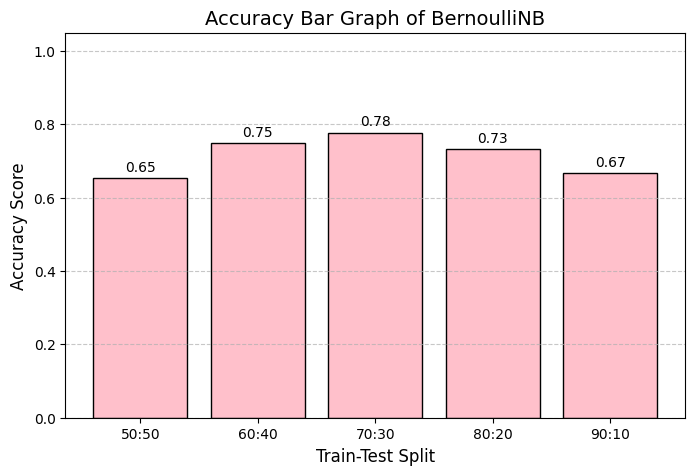

In [117]:
import matplotlib.pyplot as plt
import numpy as np

x_labels = ["50:50", "60:40", "70:30", "80:20", "90:10"]

y_values = np.array(bern_accuracy_scores)


plt.figure(figsize=(8, 5))
bars = plt.bar(x_labels, y_values, color='pink', edgecolor='black')

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.01,
             f"{height:.2f}", ha='center', va='bottom', fontsize=10)

plt.title('Accuracy Bar Graph of BernoulliNB', fontsize=14)
plt.xlabel('Train-Test Split', fontsize=12)
plt.ylabel('Accuracy Score', fontsize=12)
plt.ylim(0, 1.05)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()


***DECISION TREE***


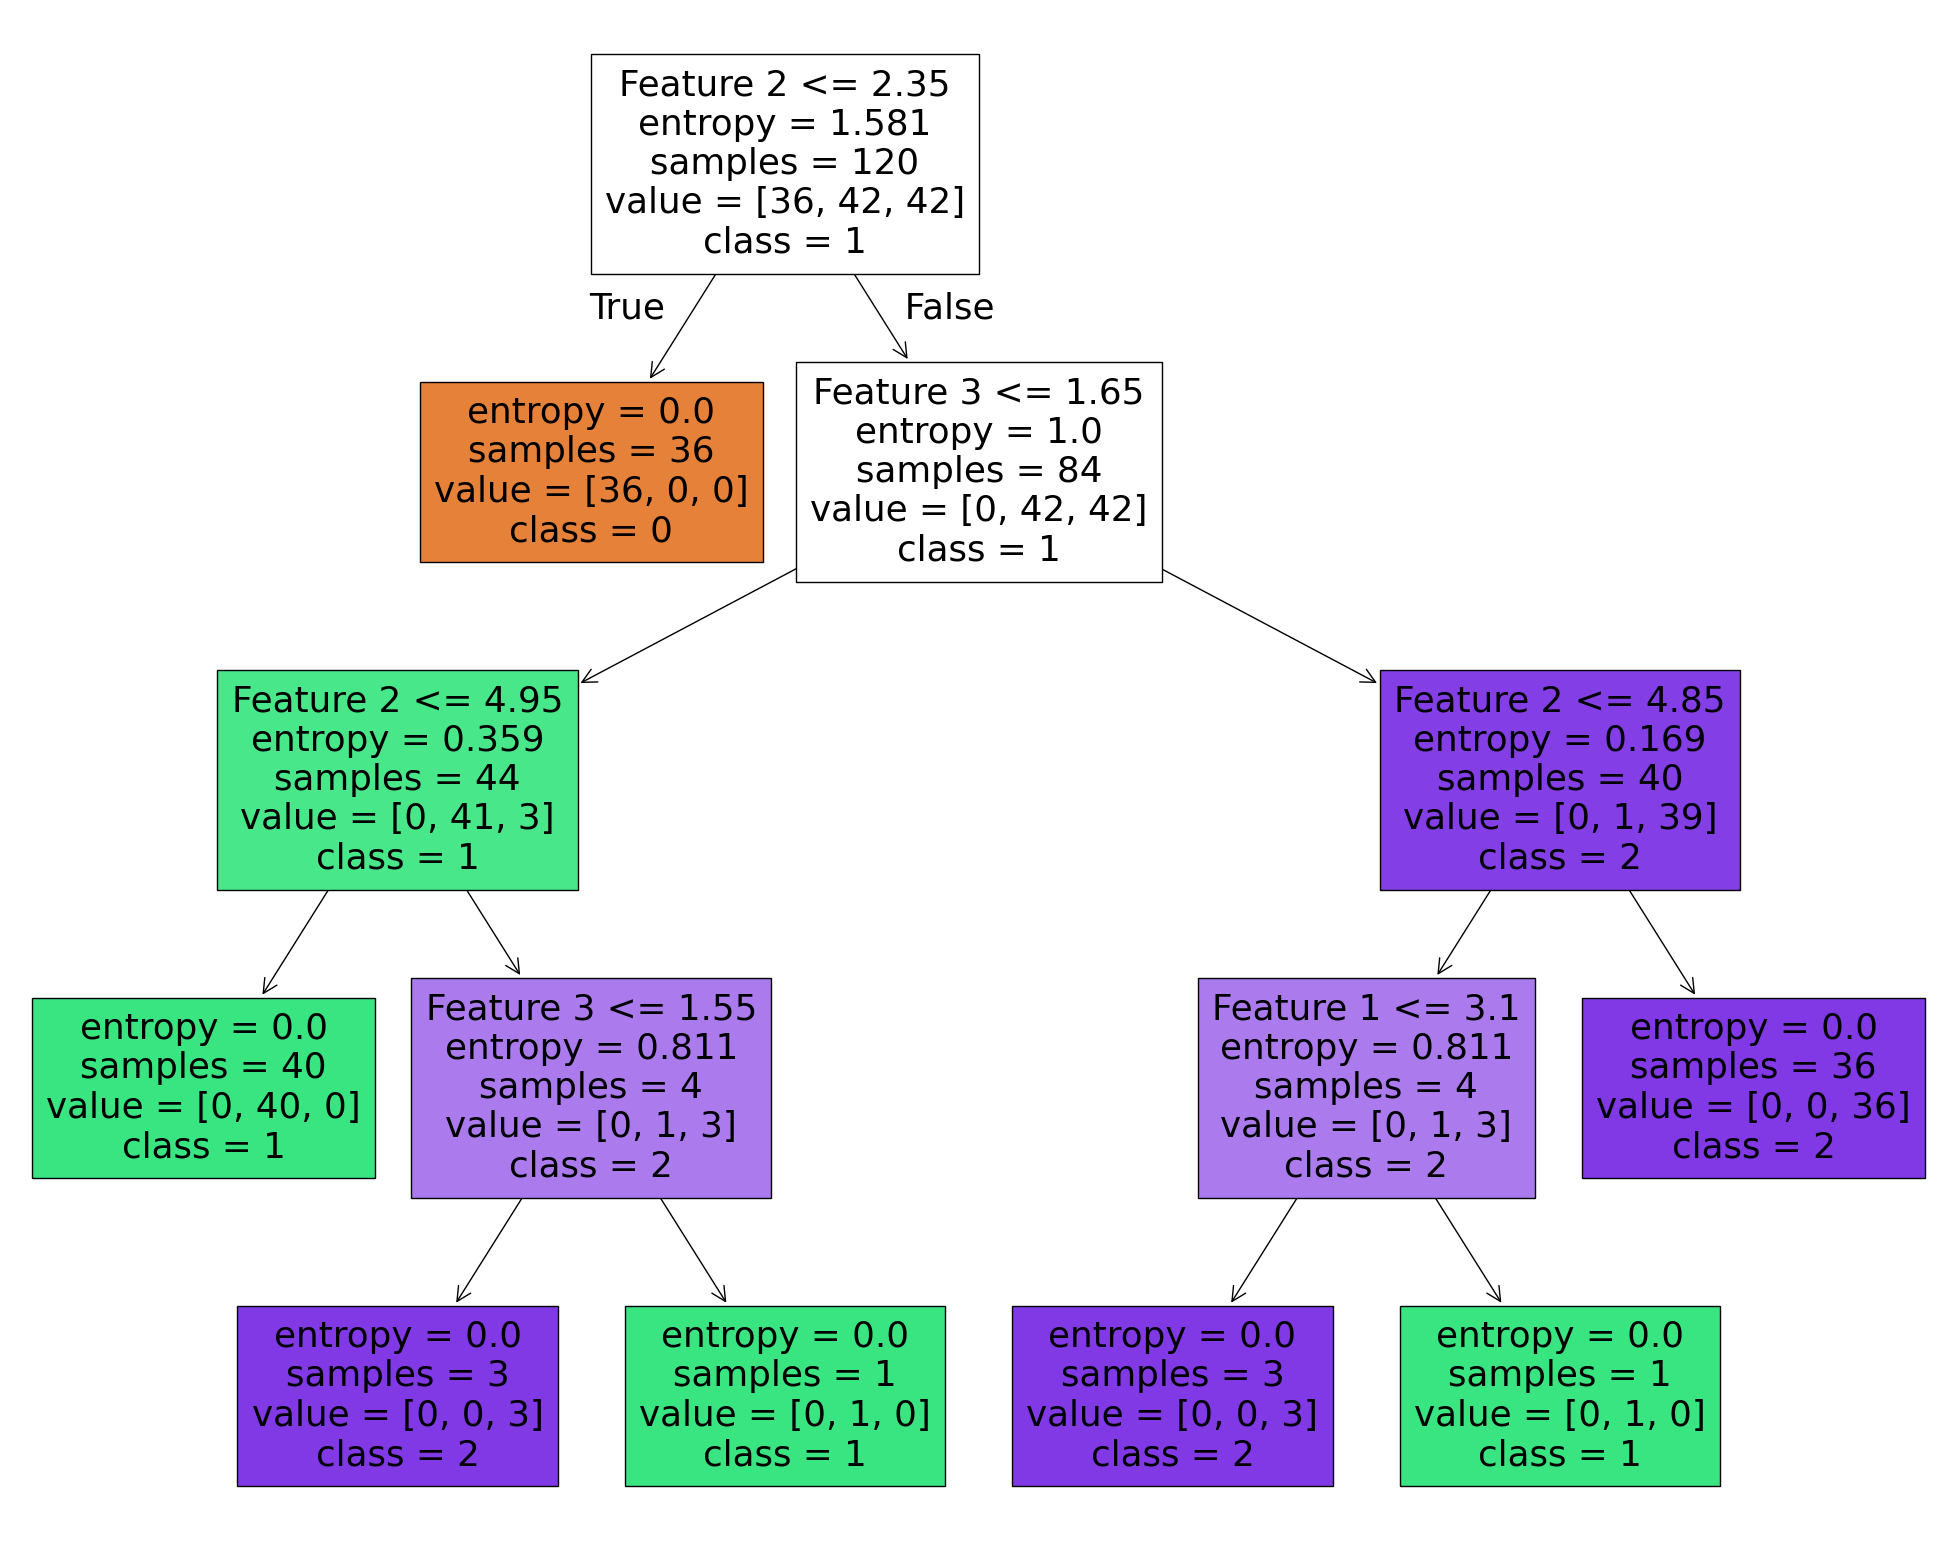

Decision Tree for Iris dataset with entropy saved as Iris_decision_tree_entropy.png


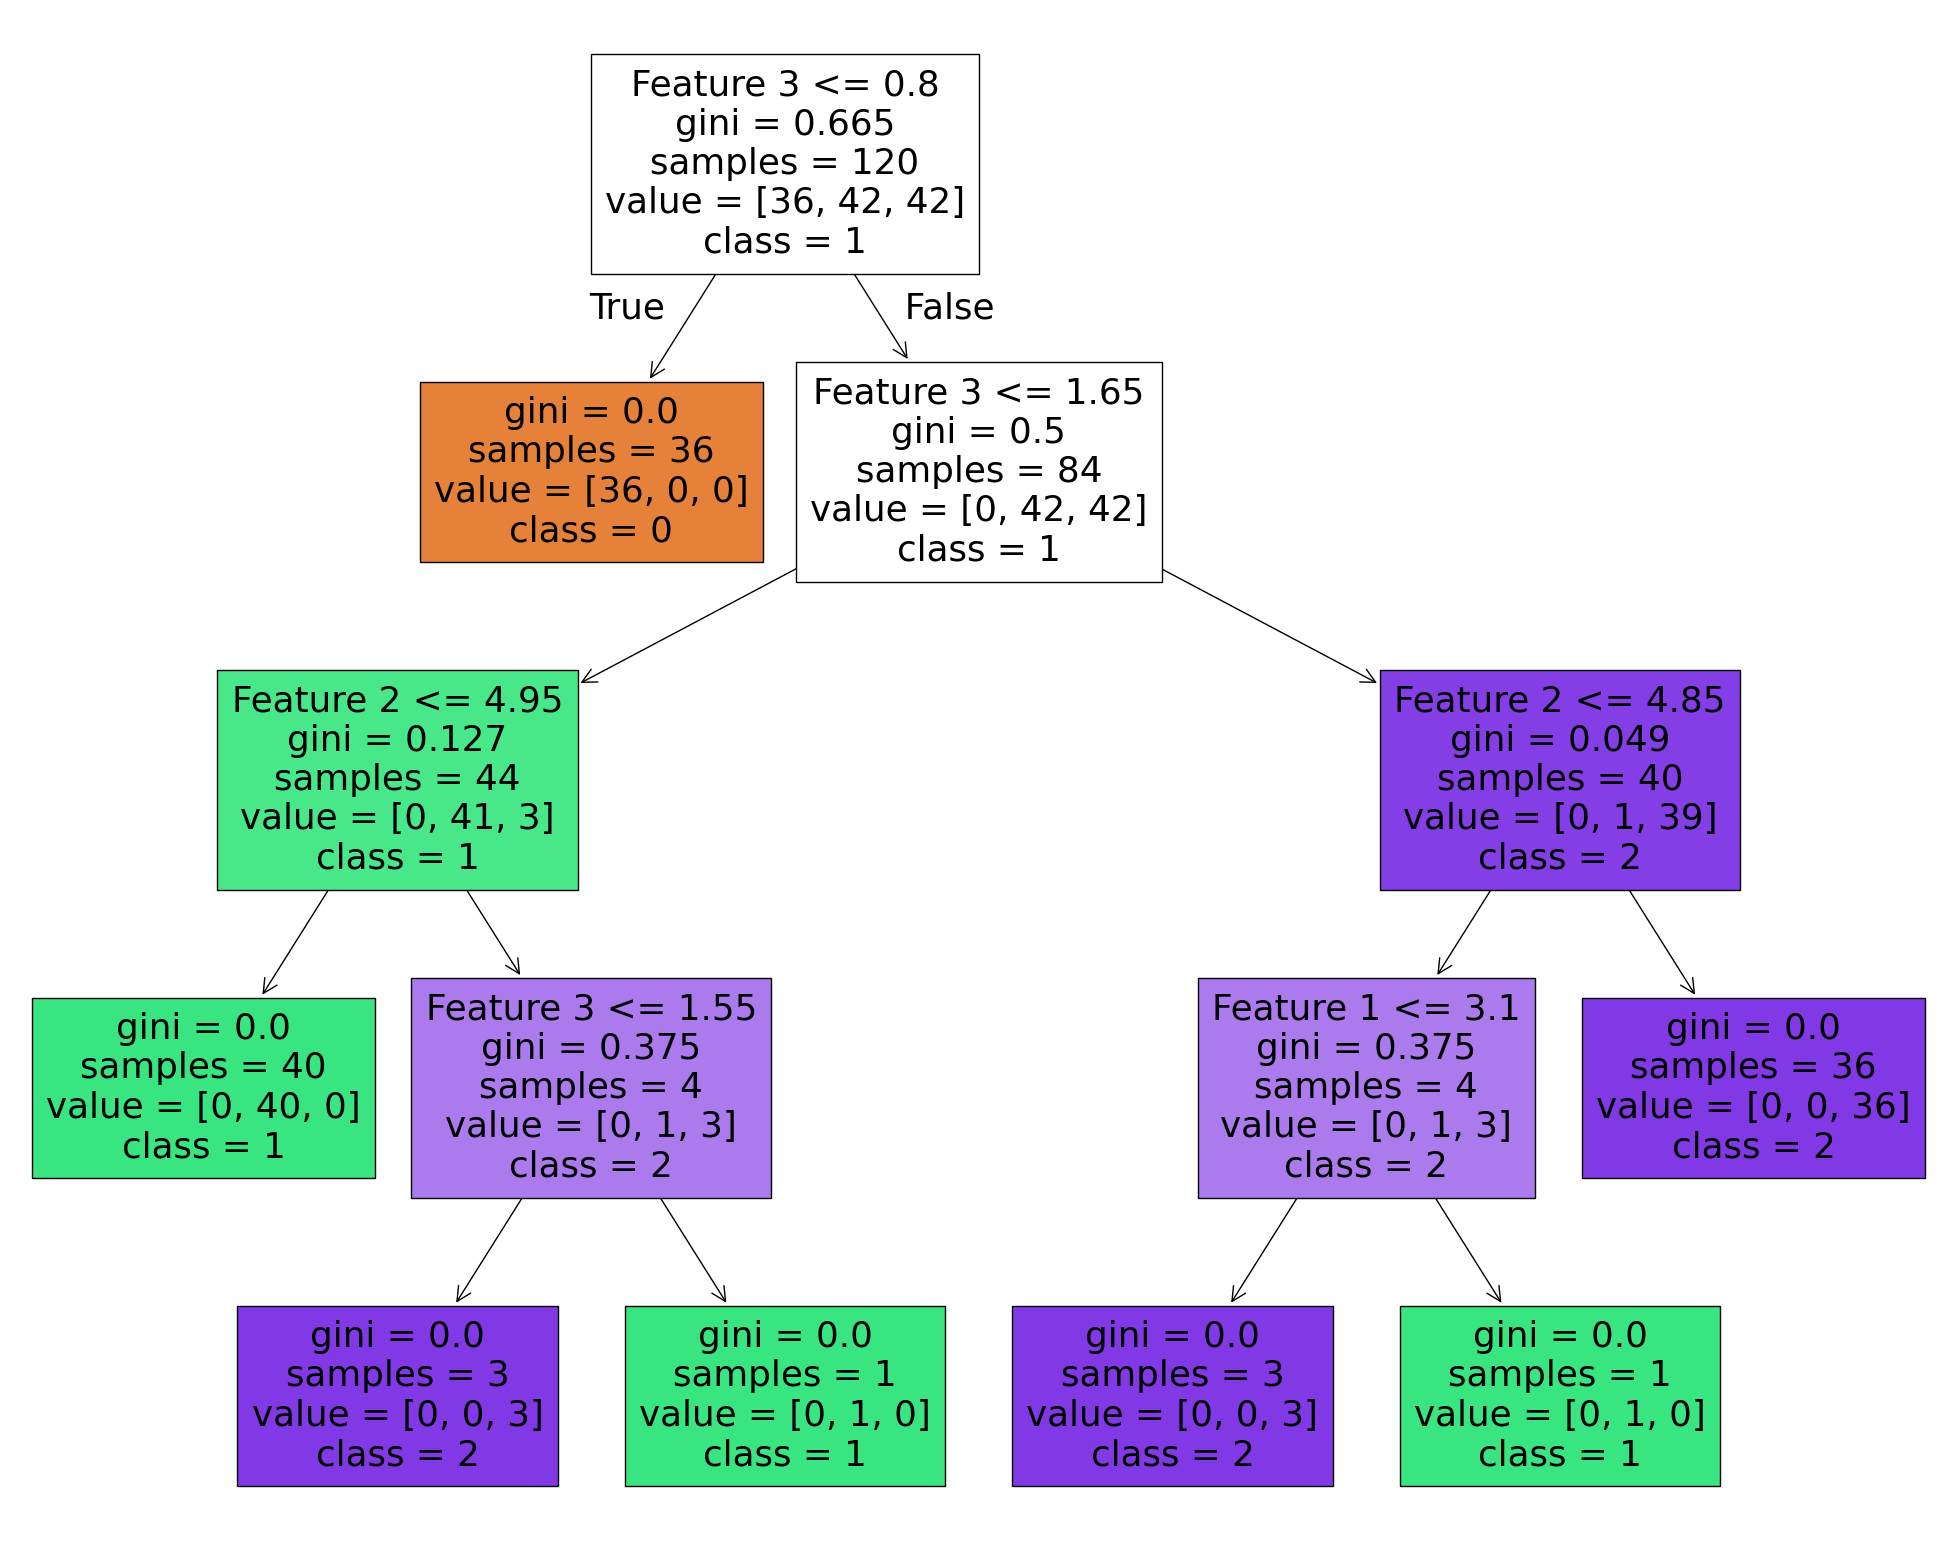

Decision Tree for Iris dataset with gini saved as Iris_decision_tree_gini.png


In [118]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

criterions = ['entropy', 'gini']

for criteria in criterions:
    fig = plt.figure(figsize=(25, 20))
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

    decision_classifier_iris = DecisionTreeClassifier(criterion=criteria)
    decision_classifier_iris.fit(X_train, Y_train)

    _ = plot_tree(decision_classifier_iris,
                  feature_names=X.columns if hasattr(X, 'columns') else [f"Feature {i}" for i in range(X.shape[1])],
                  class_names=[str(name) for name in np.unique(Y)],
                  filled=True)

    fig.savefig(f'Iris_decision_tree_{criteria}.png')
    plt.show()
    plt.close(fig)
    print(f"Decision Tree for Iris dataset with {criteria} saved as Iris_decision_tree_{criteria}.png")
    print("="*90)


# ***DATASET 2: Breast Cancer***

In [119]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
breast_cancer = fetch_ucirepo(id=17)

print(breast_cancer)

{'data': {'ids':            ID
0      842302
1      842517
2    84300903
3    84348301
4    84358402
..        ...
564    926424
565    926682
566    926954
567    927241
568     92751

[569 rows x 1 columns], 'features':      radius1  texture1  perimeter1   area1  smoothness1  compactness1  \
0      17.99     10.38      122.80  1001.0      0.11840       0.27760   
1      20.57     17.77      132.90  1326.0      0.08474       0.07864   
2      19.69     21.25      130.00  1203.0      0.10960       0.15990   
3      11.42     20.38       77.58   386.1      0.14250       0.28390   
4      20.29     14.34      135.10  1297.0      0.10030       0.13280   
..       ...       ...         ...     ...          ...           ...   
564    21.56     22.39      142.00  1479.0      0.11100       0.11590   
565    20.13     28.25      131.20  1261.0      0.09780       0.10340   
566    16.60     28.08      108.30   858.1      0.08455       0.10230   
567    20.60     29.33      140.10  1265.0      

In [120]:
import pandas as pd
import numpy as np

# Convert features and targets into DataFrames
cancer_features = pd.DataFrame(breast_cancer.data.features, columns=breast_cancer.data.feature_names)
cancer_targets = pd.DataFrame(breast_cancer.data.targets, columns=breast_cancer.data.target_names)

# Optionally, combine features and target into a single DataFrame
breast_cancer_dataset = pd.concat([cancer_features, cancer_targets], axis=1)
breast_cancer_dataset.head()

,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,fractal_dimension1,...,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3,Diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,M
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,M
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,M
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,M
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,M


***GaussianNB***

In [121]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, f1_score
import pandas as pd

# Load dataset
cancer = load_breast_cancer()
cancer_features = cancer.data
cancer_targets = cancer.target

def gauss_naive_bayes(size):
    # Splitting training dataset
    X_train, X_test, Y_train, Y_test = train_test_split(
        cancer_features, cancer_targets, test_size=size, random_state=42
    )

    # Classification model Naive Bayes
    GaussClassifier = GaussianNB().fit(X_train, Y_train)

    # Predicting testing dataset
    Y_predict = GaussClassifier.predict(X_test)

    # Metrics
    accuracy = accuracy_score(Y_test, Y_predict)
    precision = precision_score(Y_test, Y_predict, average='weighted')
    recall = recall_score(Y_test, Y_predict, average='weighted')
    f1 = f1_score(Y_test, Y_predict, average='weighted')

    # Printing metrics
    print("Accuracy Score: ", accuracy)
    print("==================================================")
    print("Precision Score:", precision)
    print("==================================================")
    print("Recall Score:   ", recall)
    print("==================================================")
    print("F1 Score:       ", f1)
    print("==================================================")
    print("Confusion Matrix:\n", confusion_matrix(Y_test, Y_predict))
    print("==================================================")
    print("Classification Report:\n", classification_report(Y_test, Y_predict))
    print("==================================================================================")

    return accuracy, precision, recall, f1


In [122]:


# Generating Report for Different Test Sizes
results = []
test_sizes = [0.5, 0.4, 0.3, 0.2, 0.1]

for size in test_sizes:
    print(f"\nReport of Gaussian Naive Bayes for test size: {size}")
    accuracy, precision, recall, f1 = gauss_naive_bayes(size)
    results.append({
        'Test Size': size,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1
    })

# Display results as table
df_results = pd.DataFrame(results)
print("\nSummary of Results:")
print(df_results)



Report of Gaussian Naive Bayes for test size: 0.5
Accuracy Score:  0.9438596491228071
Precision Score: 0.9436821219715956
Recall Score:    0.9438596491228071
F1 Score:        0.9437195753146851
Confusion Matrix:
 [[ 89   9]
 [  7 180]]
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.91      0.92        98
           1       0.95      0.96      0.96       187

    accuracy                           0.94       285
   macro avg       0.94      0.94      0.94       285
weighted avg       0.94      0.94      0.94       285


Report of Gaussian Naive Bayes for test size: 0.4
Accuracy Score:  0.9517543859649122
Precision Score: 0.9516808275957804
Recall Score:    0.9517543859649122
F1 Score:        0.9515354754609079
Confusion Matrix:
 [[ 73   7]
 [  4 144]]
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.91      0.93        80
           1       0.95      0.97      0.9

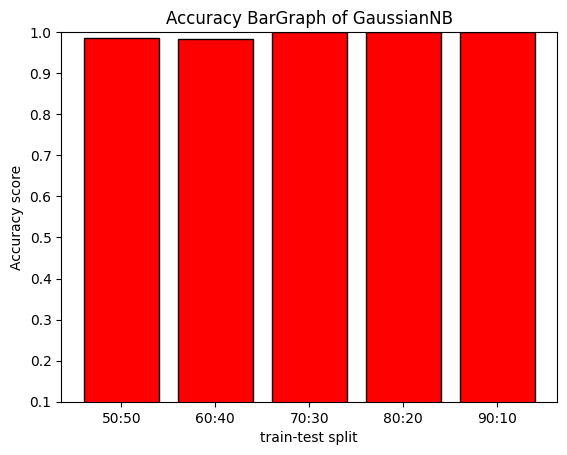

In [123]:
import matplotlib.pyplot as plt
import numpy as np

x=np.array(["50:50","60:40","70:30","80:20","90:10"])
y=np.array(gauss_accuracy_scores)

plt.bar(x,y,align='center',color="red",edgecolor="black")
plt.title('Accuracy BarGraph of GaussianNB')
plt.xlabel('train-test split')
plt.ylim(0.1,1.0)
plt.ylabel('Accuracy score')
plt.show()

***MultinomialNB***

In [124]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import MinMaxScaler

def multinomial_naive_bayes(size):
    # Scale features to be non-negative (required for MultinomialNB)
    scaler = MinMaxScaler()
    scaled_features = scaler.fit_transform(cancer_features)

    # Splitting training dataset
    X_train, X_test, Y_train, Y_test = train_test_split(
        scaled_features, cancer_targets, test_size=size, random_state=42
    )

    # Classification model Multinomial Naive Bayes
    MultiClassifier = MultinomialNB().fit(X_train, Y_train)

    # Predicting testing dataset
    Y_predict = MultiClassifier.predict(X_test)

    # Metrics
    accuracy = accuracy_score(Y_test, Y_predict)
    precision = precision_score(Y_test, Y_predict, average='weighted')
    recall = recall_score(Y_test, Y_predict, average='weighted')
    f1 = f1_score(Y_test, Y_predict, average='weighted')

    # Printing metrics
    print("Accuracy Score: ", accuracy)
    print("==================================================")
    print("Precision Score:", precision)
    print("==================================================")
    print("Recall Score:   ", recall)
    print("==================================================")
    print("F1 Score:       ", f1)
    print("==================================================")
    print("Confusion Matrix:\n", confusion_matrix(Y_test, Y_predict))
    print("==================================================")
    print("Classification Report:\n", classification_report(Y_test, Y_predict))
    print("==================================================================================")

    return accuracy, precision, recall, f1


In [125]:
test_sizes = [0.5, 0.4, 0.3, 0.2, 0.1]
results_multinomial = []

for size in test_sizes:
    print(f"\nReport of Multinomial Naive Bayes for test size: {size}")
    acc, prec, rec, f1 = multinomial_naive_bayes(size)
    results_multinomial.append({
        'Test Size': size,
        'Accuracy': acc,
        'Precision': prec,
        'Recall': rec,
        'F1 Score': f1
    })

df_results_multi = pd.DataFrame(results_multinomial)
print("\nSummary of Multinomial Naive Bayes Results:")
print(df_results_multi)


Report of Multinomial Naive Bayes for test size: 0.5
Accuracy Score:  0.8526315789473684
Precision Score: 0.8755614541442471
Recall Score:    0.8526315789473684
F1 Score:        0.8408574390267753
Confusion Matrix:
 [[ 57  41]
 [  1 186]]
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.58      0.73        98
           1       0.82      0.99      0.90       187

    accuracy                           0.85       285
   macro avg       0.90      0.79      0.81       285
weighted avg       0.88      0.85      0.84       285


Report of Multinomial Naive Bayes for test size: 0.4
Accuracy Score:  0.8464912280701754
Precision Score: 0.8705998568774117
Recall Score:    0.8464912280701754
F1 Score:        0.8342459432212631
Confusion Matrix:
 [[ 46  34]
 [  1 147]]
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.57      0.72        80
           1       0.81      0.99   

***Bargraph***

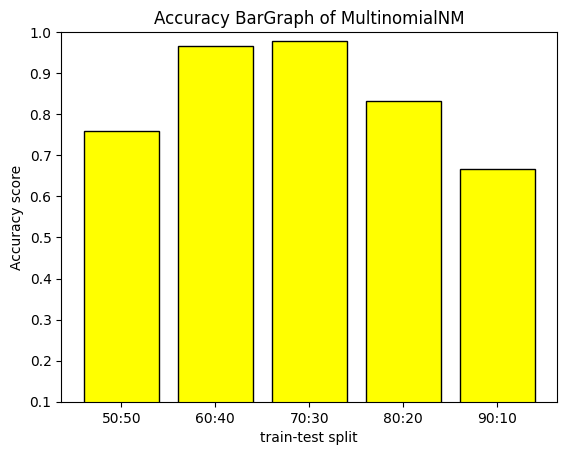

In [126]:
import matplotlib.pyplot as plt
import numpy as np

x=np.array(["50:50","60:40","70:30","80:20","90:10"])
y=np.array(multi_accuracy_scores)

plt.bar(x,y,align='center',color="yellow",edgecolor="black")
plt.title('Accuracy BarGraph of MultinomialNM')
plt.xlabel('train-test split')
plt.ylim(0.1,1.0)
plt.ylabel('Accuracy score')
plt.show()

***BernoulliNB***

In [127]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.preprocessing import Binarizer

def bernoulli_naive_bayes(size):
    # Binarize features (BernoulliNB expects binary input)
    binarizer = Binarizer(threshold=0.0)  # All >0 becomes 1, else 0
    binary_features = binarizer.fit_transform(cancer_features)

    # Splitting training dataset
    X_train, X_test, Y_train, Y_test = train_test_split(
        binary_features, cancer_targets, test_size=size, random_state=42
    )

    # Classification model Bernoulli Naive Bayes
    BernClassifier = BernoulliNB().fit(X_train, Y_train)

    # Predicting testing dataset
    Y_predict = BernClassifier.predict(X_test)

    # Metrics
    accuracy = accuracy_score(Y_test, Y_predict)
    precision = precision_score(Y_test, Y_predict, average='weighted')
    recall = recall_score(Y_test, Y_predict, average='weighted')
    f1 = f1_score(Y_test, Y_predict, average='weighted')

    # Printing metrics
    print("Accuracy Score: ", accuracy)
    print("==================================================")
    print("Precision Score:", precision)
    print("==================================================")
    print("Recall Score:   ", recall)
    print("==================================================")
    print("F1 Score:       ", f1)
    print("==================================================")
    print("Confusion Matrix:\n", confusion_matrix(Y_test, Y_predict))
    print("==================================================")
    print("Classification Report:\n", classification_report(Y_test, Y_predict))
    print("==================================================================================")

    return accuracy, precision, recall, f1


In [80]:
test_sizes = [0.5, 0.4, 0.3, 0.2, 0.1]
results_bernoulli = []

for size in test_sizes:
    print(f"\nReport of Bernoulli Naive Bayes for test size: {size}")
    acc, prec, rec, f1 = bernoulli_naive_bayes(size)
    results_bernoulli.append({
        'Test Size': size,
        'Accuracy': acc,
        'Precision': prec,
        'Recall': rec,
        'F1 Score': f1
    })

import pandas as pd
df_results_bernoulli = pd.DataFrame(results_bernoulli)
print("\nSummary of Bernoulli Naive Bayes Results:")
print(df_results_bernoulli)



Report of Bernoulli Naive Bayes for test size: 0.5
Accuracy Score:  0.656140350877193
Precision Score: 0.430520160049246
Recall Score:    0.656140350877193
F1 Score:        0.5199078203984537
Confusion Matrix:
 [[  0  98]
 [  0 187]]
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        98
           1       0.66      1.00      0.79       187

    accuracy                           0.66       285
   macro avg       0.33      0.50      0.40       285
weighted avg       0.43      0.66      0.52       285


Report of Bernoulli Naive Bayes for test size: 0.4
Accuracy Score:  0.6491228070175439
Precision Score: 0.4213604185903355
Recall Score:    0.6491228070175439
F1 Score:        0.5110115714818962
Confusion Matrix:
 [[  0  80]
 [  0 148]]
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        80
           1       0.65      1.00      0.79

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/m

***Bargraph***

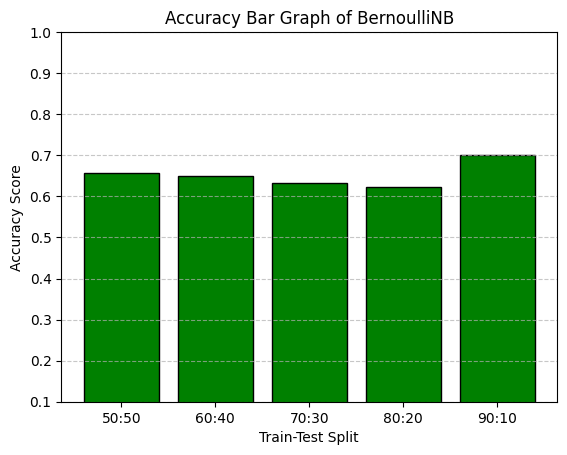

In [128]:

# Plot accuracy bar graph
import matplotlib.pyplot as plt
import numpy as np

x = np.array(["50:50", "60:40", "70:30", "80:20", "90:10"])
y = np.array(bernoulli_accuracy_scores)

plt.bar(x, y, align='center', color='green', edgecolor='black')
plt.title('Accuracy Bar Graph of BernoulliNB')
plt.xlabel('Train-Test Split')
plt.ylabel('Accuracy Score')
plt.ylim(0.1, 1.0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


***Decision Tree Image***

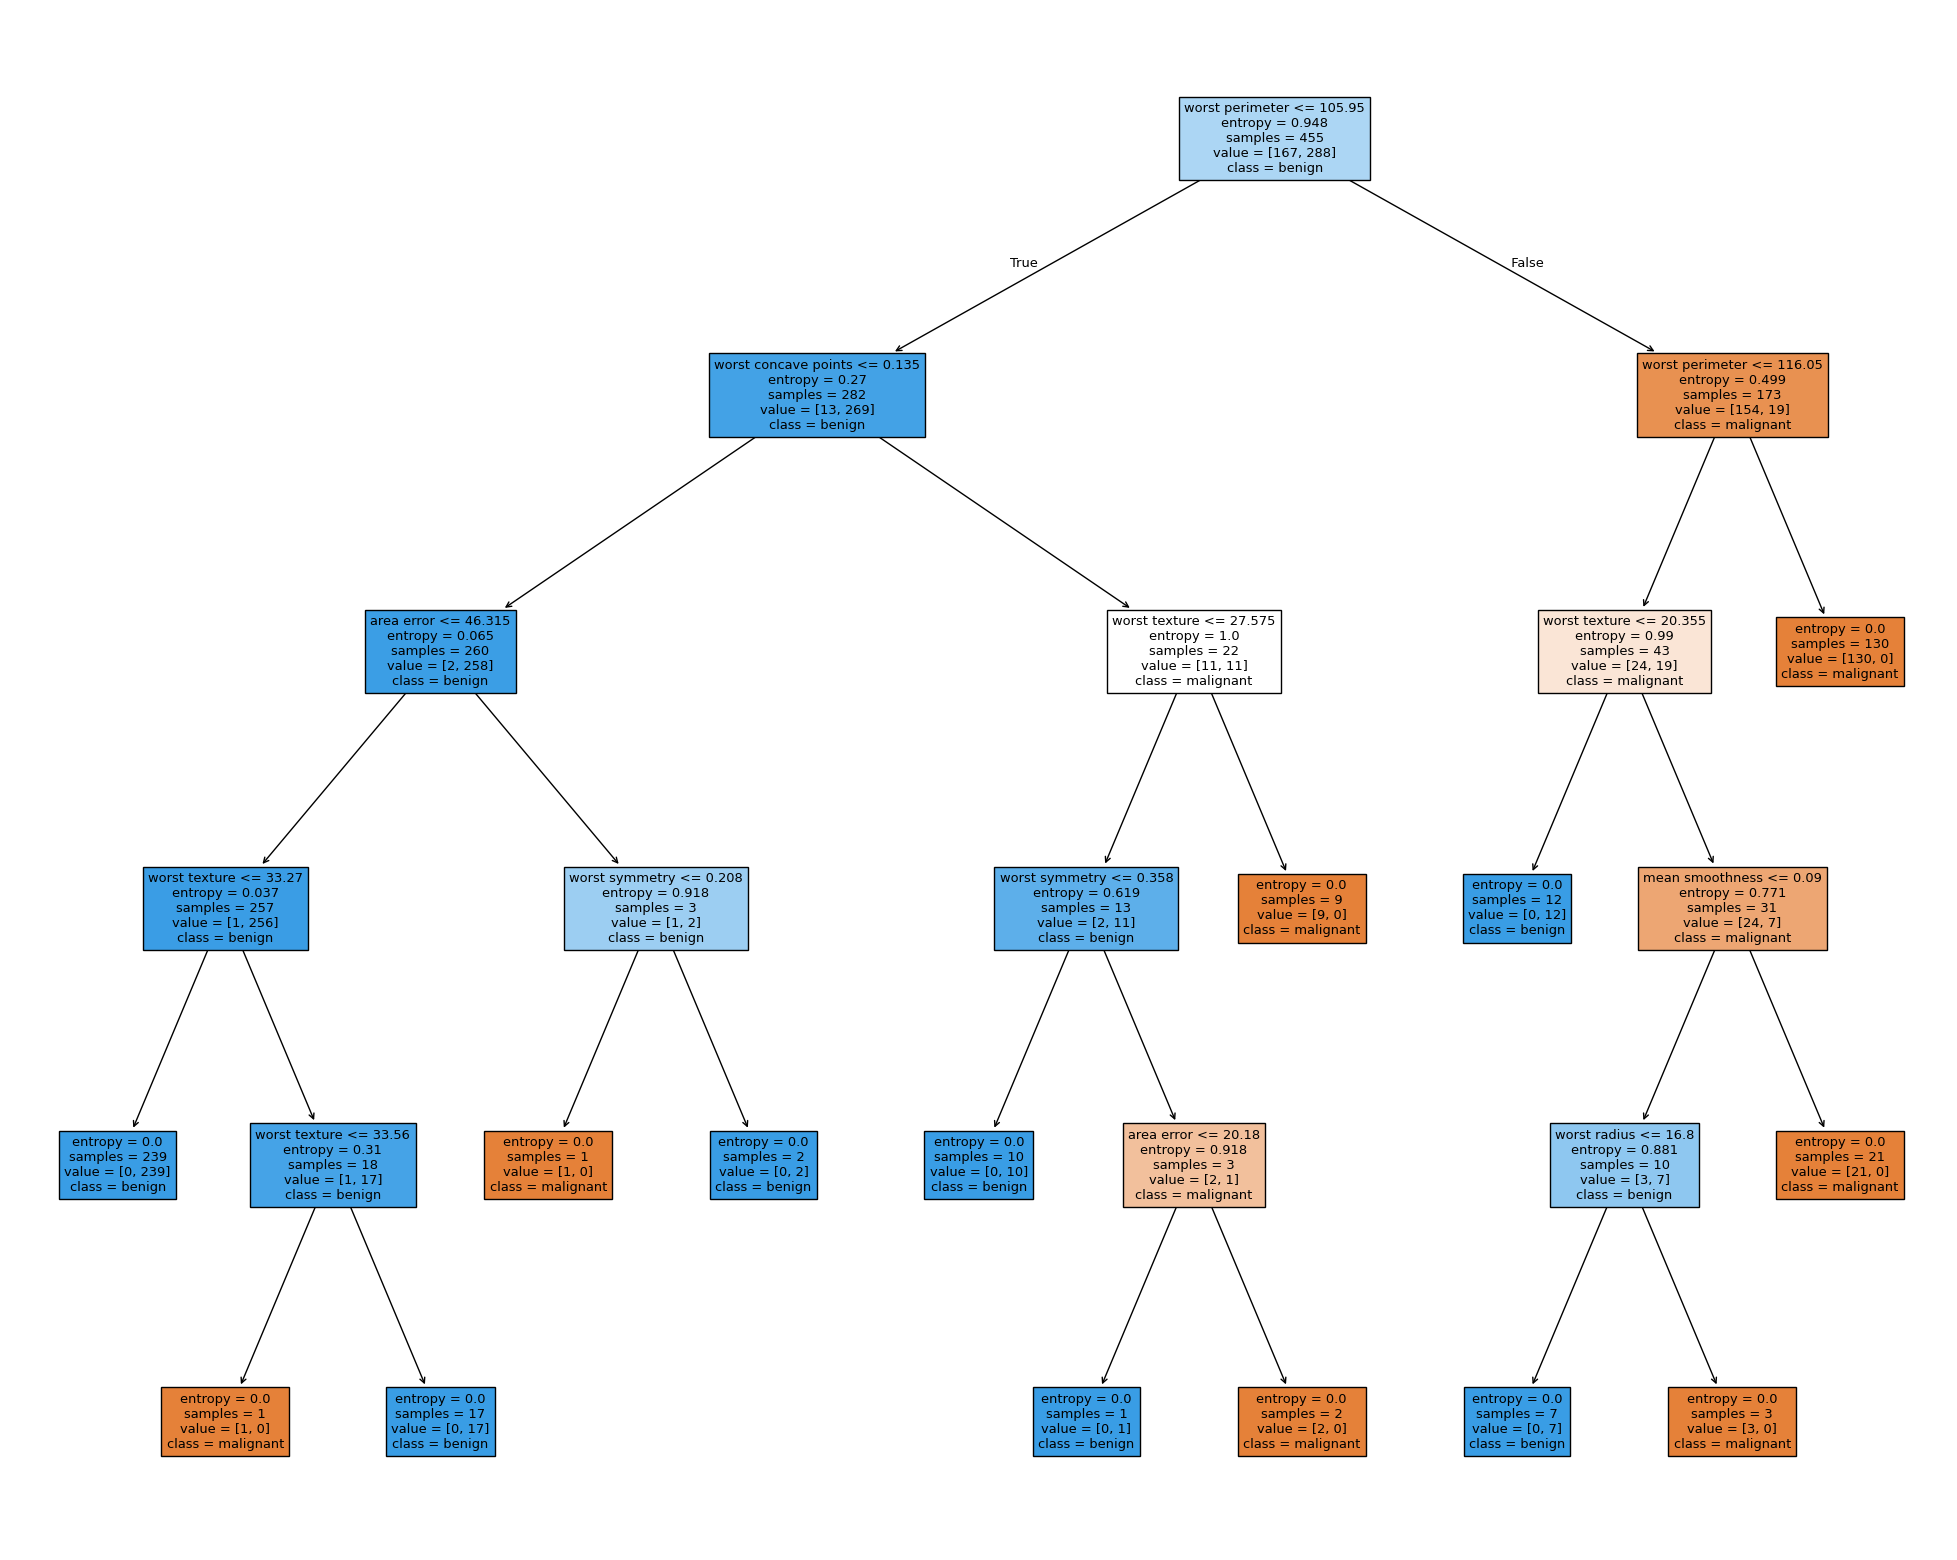

Decision Tree for Breast Cancer dataset with entropy saved as BreastCancer_decision_tree_entropy.png


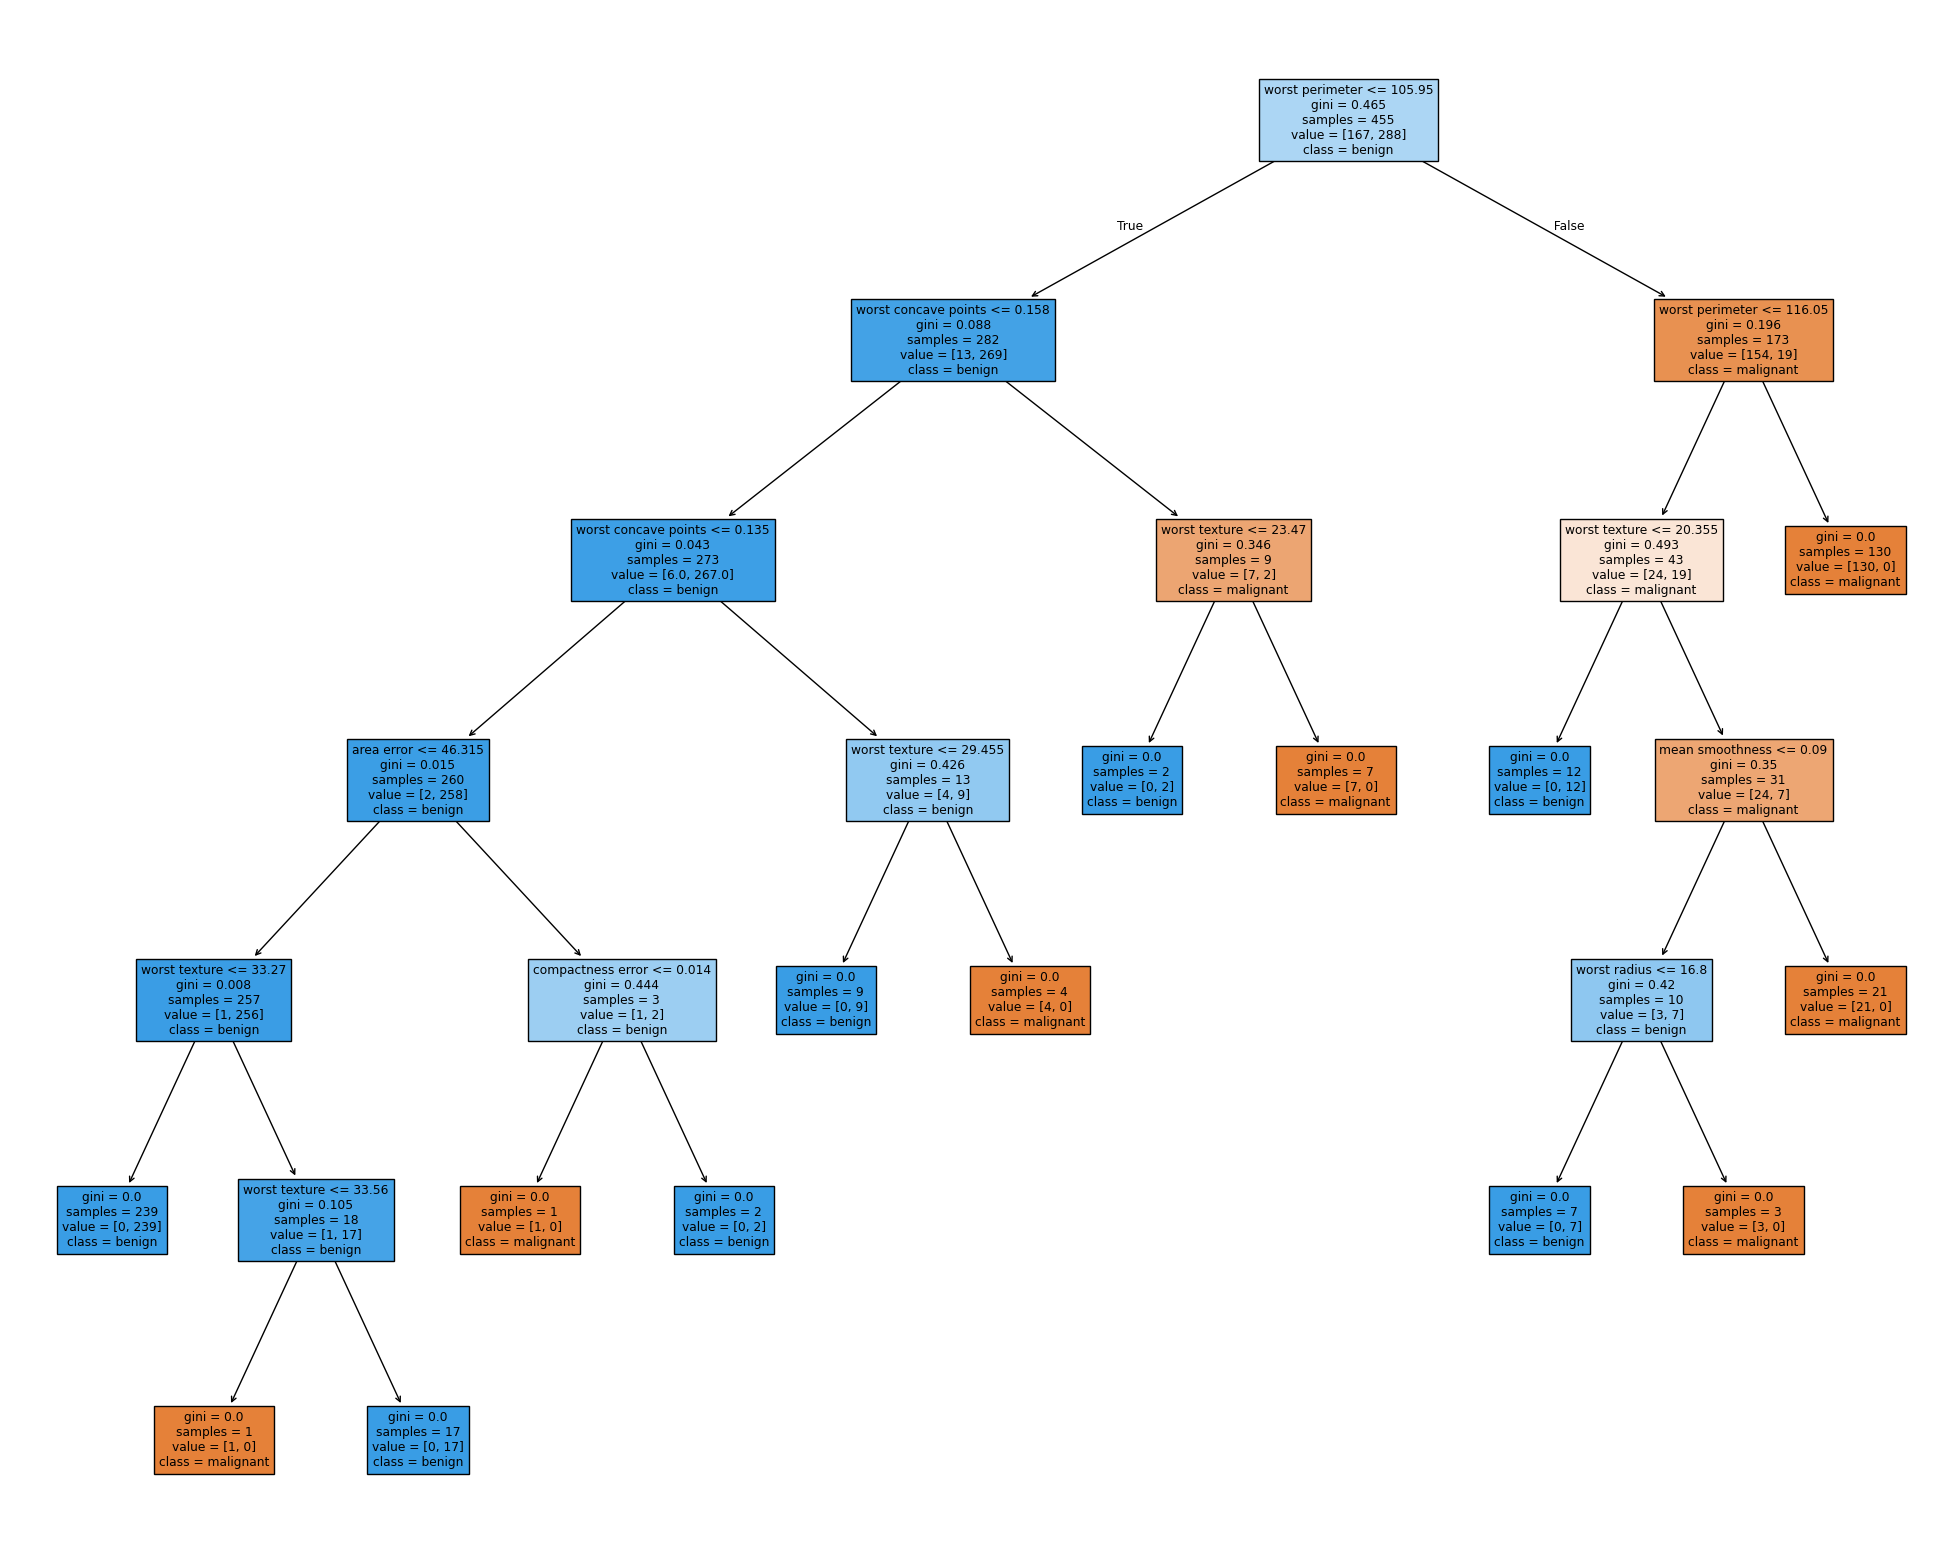

Decision Tree for Breast Cancer dataset with gini saved as BreastCancer_decision_tree_gini.png


In [130]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

criterions = ['entropy', 'gini']

for criteria in criterions:
    fig = plt.figure(figsize=(25, 20))

    # Split dataset
    X_train, X_test, Y_train, Y_test = train_test_split(
        cancer_features, cancer_targets, test_size=0.2, random_state=2
    )

    # Train Decision Tree
    DecisionClassifier = DecisionTreeClassifier(criterion=criteria).fit(X_train, Y_train)

    # Plot the tree
    _ = plot_tree(
        DecisionClassifier,
        feature_names=cancer.feature_names,  # use sklearn's feature names
        class_names=cancer.target_names,     # use sklearn's target names
        filled=True
    )

    # Save figure
    fig.savefig(f'BreastCancer_decision_tree_{criteria}.png')
    plt.show()
    plt.close(fig)

    print(f'Decision Tree for Breast Cancer dataset with {criteria} saved as BreastCancer_decision_tree_{criteria}.png')
    print('=============================================================================================')


In [131]:
import pprint
from sklearn.model_selection import GridSearchCV
X_train, X_test, Y_train, Y_test = train_test_split(cancer_features, cancer_targets, test_size=0.2, random_state=2)
param_grid = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [3, None],
    'min_samples_split': [2,0.1],
    'min_samples_leaf': [1,2],
    'min_weight_fraction_leaf': [0.0,0.1],
    'max_features': ['sqrt', 'log2', None],
    'max_leaf_nodes': [None,20],
    'min_impurity_decrease': [0.0,0.01],
    'class_weight': [None, 'balanced'],
    'ccp_alpha': [0.0,0.01],
    'random_state': [42],
}
grid_search = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=2, scoring='accuracy')
grid_search.fit(X_train, Y_train)
best_classifier = grid_search.best_estimator_
Y_predict = best_classifier.predict(X_test)
print("Tuned Decision Tree for Iris Dataset:")
print("Best Parameters:")
pprint.pprint(grid_search.best_params_)
print("Accuracy Score: ", accuracy_score(Y_test, Y_predict))
print("==================================================")
print("Confusion Matrix:\n", confusion_matrix(Y_test, Y_predict))
print("==================================================")
print("Classification Report:\n", classification_report(Y_test, Y_predict))

Tuned Decision Tree for Iris Dataset:
Best Parameters:
{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 42,
 'splitter': 'random'}
Accuracy Score:  0.9210526315789473
Confusion Matrix:
 [[43  2]
 [ 7 62]]
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.96      0.91        45
           1       0.97      0.90      0.93        69

    accuracy                           0.92       114
   macro avg       0.91      0.93      0.92       114
weighted avg       0.93      0.92      0.92       114

